<a href="https://colab.research.google.com/github/ekqlsrla/ESAA-2/blob/main/HW/1107_CH8_06_09_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B0%80%EC%9D%B4%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **파이썬 머신러닝 완벽 가이드**


---
## **| 6.** 토픽 모델링(Topioc Modeling) - 20 뉴스그룹


1. 토픽 모델링 : 문서 집합에 숨어있는 주제를 찾아내는 것
  * 자주 사용되는 기법 : `LSA` & `LDA`


2. LDA(Latent Dirichlet Allocation)기반 토픽 모델링

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

cats = ['rec.motorcycles', 'rec.sport.baseball','comp.graphics','comp.windows.x',
        'talk.politics.mideast','soc.religion.christian','sci.electronics','sci.med']

#위에서 cats 변수로 기재된 카테고리만 추출
news_df = fetch_20newsgroups(subset = 'all', remove = ('headers','footers','quotes'),
                             categories = cats, random_state  = 0)

#LDA는 Count기반의 벡터화만 적용
count_vect = CountVectorizer(max_df = 0.95, max_features = 1000, min_df = 2, stop_words = 'english',
                             ngram_range = (1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape :', feat_vect.shape)

CountVectorizer Shape : (7862, 1000)


In [2]:
#토픽 개수 조정

lad = LatentDirichletAllocation(n_components = 8, random_state = 0)
lad.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [3]:
#components_는 개별 토픽별로 각 word 피처가 얼마나 많이 그 토픽에 할당됐는지에 대한 수치

print(lad.components_.shape)
lad.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

In [4]:
def display_topics(model,feature_names, no_top_words) :
  for topic_index, topic in enumerate(model.components_) :
    print('Topic # ', topic_index)

    #components_array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환
    topic_word_indexes = topic.argsort()[::-1]
    top_indexes = topic_word_indexes[:no_top_words]

    #top_indexes 대상인 인덱스별로 feature_name에 해당하는 word feature추출 후 concat
    feature_concat = ' '.join([feature_names[i] for i in top_indexes])
    print(feature_concat)

feature_names = count_vect.get_feature_names()

display_topics(lad, feature_names,15)

Topic #  0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic #  1
don just like know people said think time ve didn right going say ll way
Topic #  2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic #  3
like know don think use does just good time book read information people used post
Topic #  4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic #  5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic #  6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic #  7
use dos thanks windows using window does display help like problem server need know run


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


---
## **| 8.** 문서유사도

### 1. 문서 유사도 측정 방법 - 코사인 유사도

: 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기 보다는 벡터의 상호 방향성이 얼마나 유사한지에 기반

### 2. 두 벡터 사잇각

* 두 벡터 A와 B의 내적 값
$$A * B = ||A|| ||B|| cos θ$$



In [5]:
#코사인 유사도를 구하는 함수

import numpy as np

def cos_similarity(v1,v2) :
  dot_product = np.dot(v1,v2)
  l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
  similarity = dot_product/l2_norm

  return similarity

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [7]:
#밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()

vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

#코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도 : {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도 : 0.402


In [8]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1,vect3)
print('문장 1, 문장 3 Cosine 유사도 : {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect2,vect3)
print('문장 2, 문장 3 Cosine 유사도 : {0:.3f}'.format(similarity_simple))


문장 1, 문장 3 Cosine 유사도 : 0.404
문장 2, 문장 3 Cosine 유사도 : 0.456


In [9]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

#[첫번쨰 문서 자신에 대한 유사도, 첫번째 문서와 두번째 문서, 첫번째 문서와 세번째 문서]

[[1.         0.40207758 0.40425045]]


In [10]:
similarity_simple_pair = cosine_similarity(feature_vect_simple,feature_vect_simple)
print(similarity_simple_pair)
print('shape : ', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape :  (3, 3)


### 3. Opinion Review 데이터 세트를 이용한 문서 유사도 측정

In [8]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import pandas as pd
import glob,os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

#절대 경로 설정
path = r'/content/drive/MyDrive/Colab Notebooks/ESAA-2/DATA/Opinion Review/OpinosisDataset1.0/topics'
all_files = glob.glob(os.path.join(path,'*.data'))
filename_list = []
opinion_text = []

for file_ in all_files :
  df = pd.read_table(file_, index_col = None, header = 0, encoding = 'latin1')
  filename_ = file_.split('/')[-1]
  filename = filename_.split('.')[0]
  filename_list.append(filename)
  opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename': filename_list,'opinion_text': opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer = LemNormalize, stop_words = 'english',
                             ngram_range = (1,2),min_df = 0.05,max_df = 0.85)

feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters = 3, max_iter = 10000, random_state = 0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


In [13]:
from sklearn.metrics.pairwise import cosine_similarity

#cluster_label = 1인 데이터는 호텔로 군집화
hotel_indexes = document_df[document_df['cluster_label'] ==1].index
print('호텔로 군집화된 문소덜의 DataFrame Index :',hotel_indexes)

#호텔로 군집화된 데이터 중 첫번째 문서 추출해 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명',comparison_docname,' 와 타 문서 유사도 #####')

#호텔로 군집화된 문서 중 첫번쨰 문서와 다른 문서 간의 코사인 유사도 측정
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 군집화된 문소덜의 DataFrame Index : Int64Index([23, 26, 32, 37, 42, 44, 45, 48, 49, 50], dtype='int64')
##### 비교 기준 문서명 gas_mileage_toyota_camry_2007  와 타 문서 유사도 #####
[[1.         0.27273923 0.0879083  0.15655631 0.96608144 0.08217817
  0.14398794 0.20206332 0.06276647 0.05452321]]


Text(0.5, 1.0, 'gas_mileage_toyota_camry_2007')

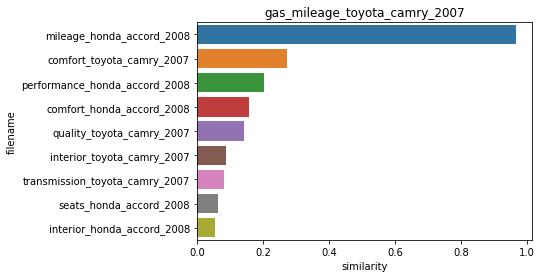

In [14]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:,1:]

#유사도가 큰 순으로 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

#유사도가 큰 순으로 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename',data=hotel_1_sim_df)
plt.title(comparison_docname)

---
## **| 9.** 한글 텍스트 처리 - 네이버 영화 평점 감성 분석



### 1. 한글 NLP 처리의 어려움
: 띄어씌기와 조사로 인해 NLP 처리가 어려움

### 2. KoNLPy 소개

: 파이썬의 대표적인 한글 형태소 패키지

In [15]:
! pip install --upgrade pip
! pip install JPype1-0.5.7-cp27-none-win_amd64.whl

ERROR: You must give at least one requirement to install (see "pip help install")


In [16]:
! pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.1 MB/s 
     |████████████████████████████████| 465 kB 52.0 MB/s 


In [21]:
import pandas as pd

train_df = pd.read_csv('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt',sep = '\t')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [22]:
train_df['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

In [24]:
import re

train_df = train_df.fillna(' ')
train_df['document'] = train_df['document'].apply(lambda x : re.sub(r'\d+'," ",x))

test_df = pd.read_csv('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt',sep = '\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply(lambda x : re.sub(r"\d"," ", x))

#id 칼럼 삭제
train_df.drop('id',axis = 1, inplace = True)
test_df.drop('id',axis = 1, inplace = True)

* SNS 분석에 적합한 **Twitter**클래스 이용
  * `morphs()` 메서드를 이용하면 입력 인자로 들어온 문장을 형태소 단어 형태로 토큰화해 list 객체로 반환

In [26]:
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text) :
  tokens_ko = twitter.morphs(text)
  return tokens_ko

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

tfidf_vect = TfidfVectorizer(tokenizer = tw_tokenizer, ngram_range = (1,2), min_df = 3, max_df = 0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [29]:
#로지스틱 회귀를 이용해 감성 분석 분류 수행
lg_clf = LogisticRegression(random_state = 0)

params = {
    'C' : [1,3.5,4.5,5.5,10]
}

gridcv = GridSearchCV(lg_clf, param_grid = params, cv = 3, scoring = 'accuracy', verbose = 1)
gridcv.fit(tfidf_matrix_train,train_df['label'])
print(gridcv.best_params_, round(gridcv.best_score_,4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'C': 3.5} 0.8593


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [31]:
from sklearn.metrics import accuracy_score

tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

best_estimator = gridcv.best_estimator_
pred = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도 :', accuracy_score(test_df['label'],pred))

Logistic Regression 정확도 : 0.86186
